<a href="https://colab.research.google.com/github/fid2445/Fids-Sales-Predictions/blob/main/Final_SalesPredictionsProjectMikeFiddler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mike Fiddler 
### Project 1 

In [1025]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display='diagram')
df = pd.read_csv("/content/drive/MyDrive/sales_predictions.csv")

In [1026]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1027]:
df_ml = df.copy()

In [1028]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

### 1) [8523 rows x 12 columns]

In [1029]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1030]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [1031]:
df.duplicated().sum()

0

In [1032]:
# good no duplicates to get rid of

In [1033]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### two columns are missing information including Item_weight and Outlet_size

In [1035]:
# i am going to drop all of the Item_Weight column as these items seem to mostly be things that people NEED rather then WANT.  When it comes to need vs want usually the heft of something isnt a consideration.
# As far as the Outlet_Size column is concerned i am going to enter a value of 'unknown' in the empty rows for now.  
# Alot of people like one stop shopping so if these items are only available at larger locations this information could still prove uselful.

In [1036]:
df = df.drop(columns='Item_Weight')
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1037]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [1038]:
df.fillna('', inplace=True)
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1039]:
df['Outlet_Size'] = df['Outlet_Size'].replace('' , 'Unknown')
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1040]:
df.info() #no more missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


## no more missing data

In [1041]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1042]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [1043]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [1044]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [1045]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1046]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1047]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

## The remaining columns are expected to have inconsistant data as they are all exclusive to the specific item

In [1048]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1049]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


#5/25/22

## 6/9/22 part 3 starts here

In [1050]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()


In [1051]:
sales = df['Item_Outlet_Sales']
vis = df['Item_Visibility']
year = df['Outlet_Establishment_Year']
mrp = df['Item_MRP']

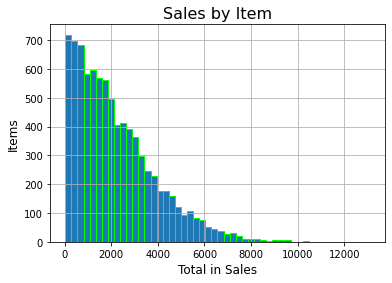

In [1052]:
#plt.style.use('seaborn') #this code was working before and seaborn gives a much easier on the eyes look but now its stopped and i cant discern why it now thinks seaborn is a string whereas before it worked fine.
df['Item_Outlet_Sales'].hist(bins=50,edgecolor='lime')
plt.xlabel('Total in Sales', fontsize=12)
plt.ylabel('Items',fontsize=12)
plt.title('Sales by Item', fontsize=16);

### this histogram shows the upward trend of items that didnt make very much in sales(left) to the items that made alot in sales (right). Even though the bins decline from left to right, the amount made from sales increases.

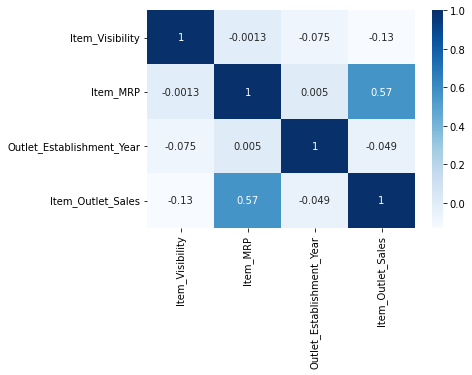

In [1053]:
sns.heatmap(corr, cmap = 'Blues', annot = True,);

### We only have a few columns to do a correlation graph with and it does come out mostly as expected.  
### There is a small correlation between Item_MRP(max retail price? i think) and item sales. 
### no correlations between establishment age or item visibilty with anything.

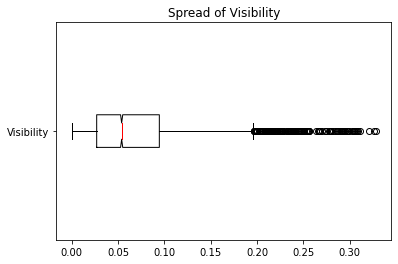

In [1054]:
bp = plt.boxplot((vis),labels=['Visibility'],notch = 'True', vert = 0)
plt.title('Spread of Visibility');
for median in bp['medians']:
  median.set(color='red')

### While im not sure how they assign a "visibilty" number to these products, this plot does seem to show us that the majority of items are not being advertised heavily, most likley because they are everyday items that will be bought regardless.  The high number of outliers could be from sales people in the stores trying to get people to buy new things or perhaps the are all the items in the checkout lane where people are more prone to make impulse buys while waiting in line.

## end of core 3 6/9/22

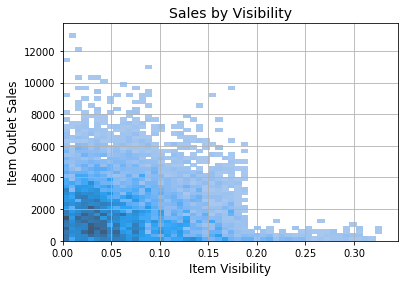

In [1055]:
sns.histplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales');
plt.title('Sales by Visibility', fontsize=14)
plt.xlabel('Item Visibility',fontsize = 12)
plt.ylabel('Item Outlet Sales', fontsize =12 );
plt.grid()
plt.xlim(left=0)
plt.ylim(bottom = 0);

### this shows us that the current visibility or what i assume they mean is advertising isnt working well.  The items with the highest visibility have the lowest sales.

In [1056]:
#df.plot(y=['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility'],subplots=True, marker='o',figsize=(15,12));                  #not useful

In [1057]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

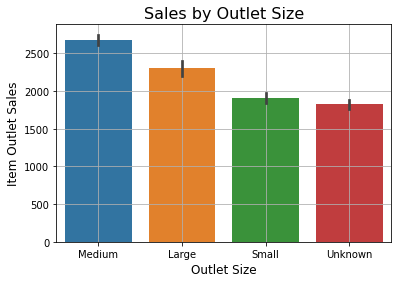

In [1058]:
sns.barplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales', order = ['Medium','Large','Small','Unknown']);
plt.title('Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size',fontsize = 12)
plt.ylabel('Item Outlet Sales', fontsize =12 );
plt.grid()


### If we base our estimate on item sales we can surmise that most of the "Unknown" category are actually "Small" outlet sized locations

## Machine learning prep

In [1059]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1060]:
df_ml = df_ml.drop(columns=['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'])
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [1061]:
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1062]:
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg', 'Regular')
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### no missing data in our X column

In [1063]:
#validation split
X = df_ml.drop(columns=['Item_Outlet_Sales'])
y = df_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [1064]:
len(X_train)

6392

In [1065]:
len(X_test)

2131

In [1066]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [1067]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [1068]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [1069]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [1070]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4535bd0b90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4535bd0bd0>)])

In [1071]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4535bd0b90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4535bd0bd0>)])

In [1072]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### code from learn platform

In [1073]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data.')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data.')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data.
0 missing values in testing data.


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

## Linear Regression

In [1074]:
reg = LinearRegression()

In [1075]:
reg_pipe = make_pipeline(scaler, reg)

In [1076]:
reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [1077]:
train_pred = reg_pipe.predict(X_train_processed)
test_pred = reg_pipe.predict(X_test_processed)

In [1078]:
predictions = reg_pipe.predict(X_test_processed)

In [1079]:
predictions

array([1276.35866813,  796.35866813,  864.35866813, ..., 3396.35866813,
       1981.35866813, 2384.35866813])

In [1080]:
prediction_df = X_test.copy()
prediction_df['True Median Price'] = y_test
prediction_df['Predicted Median Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,High,Tier 3,Supermarket Type1,1743.0644,1276.358668,-466.705732
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,Small,Tier 1,Supermarket Type1,356.8688,796.358668,439.489868
7031,14.500,Regular,0.041313,Canned,42.0454,Medium,Tier 1,Supermarket Type1,377.5086,864.358668,486.850068
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,Medium,Tier 3,Supermarket Type3,5778.4782,4243.046168,-1535.432032
856,10.195,Regular,0.012456,Meat,197.5110,Small,Tier 2,Supermarket Type1,2356.9320,3356.358668,999.426668


In [1081]:
prediction_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,True Median Price,Predicted Median Price,Error
count,1775.000000,2131.000000,2131.000000,2131.000000,2131.000000,2131.000000
mean,12.718262,0.066507,138.030391,2095.231046,2113.293910,18.062864
std,4.661051,0.052985,61.119147,1661.406808,1294.656470,1094.586637
min,4.590000,0.000000,32.490000,33.290000,-1498.953832,-5604.394132
25%,8.510000,0.026934,93.093600,772.993800,1208.358668,-532.559582
50%,12.500000,0.053586,132.528400,1737.738000,2086.358668,90.828668
75%,16.700000,0.094514,181.812100,2986.113000,3002.702418,656.525318
max,21.350000,0.311090,266.588400,10236.675000,5659.046168,3471.726968


here we can see that there is alot of deviation in our models predictions

In [1082]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2
print(f'Model Training r2: {train_r2}')
print(f'Model Testing r2: {test_r2}')

Model Training r2: 0.5602821694105955
Model Testing r2: 0.5666434849126509


In [1083]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2)).round(2)
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2)).round(2)
print(f'Model Training RMSE: ${train_RMSE}')
print(f'Model Testing RMSE: ${test_RMSE}')

Model Training RMSE: $1140.76
Model Testing RMSE: $1094.48


An average error of $1100 is very high and this might be skewed because of some of the higher priced items dont sell as often.

## Regression Tree

In [1084]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [1085]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [1086]:
train_pred2 = dec_tree.predict(X_train_processed)
test_pred2 = dec_tree.predict(X_test_processed)

In [1087]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.11426093831941997


# #overfitting

In [1088]:
dec_tree.get_depth()

42

In [1089]:
depths = list(range(2, 42)) 
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_test_processed, y_test)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

In [1090]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.59471
4,0.584005,0.584005
6,0.582408,0.582408
7,0.578864,0.578864
8,0.566687,0.566687


In [1091]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159973


In [1092]:
train_pred3 = dec_tree_5.predict(X_train_processed)
test_pred3 = dec_tree_5.predict(X_test_processed)

testing score has improved dramatically 

In [1093]:
train_r2 = np.corrcoef(y_train, train_pred3)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred3)[0][1]**2
print(f'Model Training r2: {train_r2}')
print(f'Model Testing r2: {test_r2}')

Model Training r2: 0.6039397477322962
Model Testing r2: 0.5955654955309422


In [1094]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred3 - y_train)**2)).round(2)
test_RMSE = np.sqrt(np.mean(np.abs(test_pred3 - y_test)**2)).round(2)
print(f'Model Training RMSE: ${train_RMSE}')
print(f'Model Testing RMSE: ${test_RMSE}')

Model Training RMSE: $1082.65
Model Testing RMSE: $1057.44


### I endorse using that Regression Tree model in this instance for a couple reasons. The first being that it fairs slightly better on the r2 metric by a few percentage points. Secondly is the lower RMSE on our testing data showing that this model is slighlty better in its predictions.